### Import required libraries

In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt
import numpy as np

### Read the image

In [2]:
img = mx.image.imread('Data/dog.jpg')

### Information about image

In [3]:
print("Image Type:", type(img))
print("Image Shape:", img.shape)
print("Data Type:", img.dtype)
print("Min Value: {}, and Max Value: {}".format(img.min().asscalar(), img.max().asscalar()))

Image Type: <class 'mxnet.ndarray.ndarray.NDArray'>
Image Shape: (576, 768, 3)
Data Type: <class 'numpy.uint8'>
Min Value: 0, and Max Value: 255


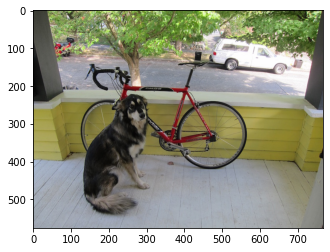

In [4]:
plt.imshow(img.asnumpy())

### Image Preprocessing

- To make a detection, we need to preprocess our image as follow:
  1. make it's dimension from (HWC) to (NCHW)
     - N --> Batch dimension
     - C --> Channels
     - H --> Height
     - W --> Width
  2. Convert it's values from uint8 to floeat32   
  3. Normalize it's values ro range from 0:1 instead of 0:255   

In [5]:
# img_transformed --> transformed image ready for network
# chw_image --> a resized version of image

# image is normalized using 1k ImageNet statistics
# image is in NCHW format instead of NHWC 
img_transformed, chw_image = gcv.data.transforms.presets.yolo.transform_test(img, short= 512)

print("Shape:", img_transformed.shape)
print("Type:", img.dtype)
print("Min Value:", img_transformed.min().asscalar())
print("Max Value:", img_transformed.max().asscalar())    

Shape: (1, 3, 512, 683)
Type: <class 'numpy.uint8'>
Min Value: -2.117904
Max Value: 2.64


In [6]:
img_transformed = img_transformed.astype(np.float32)

In [7]:
print("Shape:", img_transformed.shape)
print("Type:", img_transformed.dtype)
print("Min Value:", img_transformed.min().asscalar())
print("Max Value:", img_transformed.max().asscalar()) 

Shape: (1, 3, 512, 683)
Type: <class 'numpy.float32'>
Min Value: -2.117904
Max Value: 2.64


### Load our model YOLO3

In [8]:
model = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained = True)

### Make a predicction

In [9]:
prediction = model(img_transformed)

In [10]:
type(prediction)

tuple

In [11]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index + 1, array.shape))

# First array contains object class indexes
# Second array contains object class probabilities
# Third array contains object bounding box coordinates
'''
(1, 100, 1) --> 
   - 1   --> we give the network a batch of one image os we get back batch of 1 prediction
   - 100 --> model can predict up to 100 objects in a single image
   - 1   --> 1 class index per object

(1, 100, 4) --> 
   - 1   --> we give the network a batch of one image os we get back batch of 1 prediction
   - 100 --> model can predict up to 100 objects in a single image
   - 4   --> 4 values for each object to define bounding box
''' 

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


'\n(1, 100, 1) --> \n   - 1   --> we give the network a batch of one image os we get back batch of 1 prediction\n   - 100 --> model can predict up to 100 objects in a single image\n   - 1   --> 1 class index per object\n\n(1, 100, 4) --> \n   - 1   --> we give the network a batch of one image os we get back batch of 1 prediction\n   - 100 --> model can predict up to 100 objects in a single image\n   - 4   --> 4 values for each object to define bounding box\n'

### Unpack prediction

In [12]:
prediction = [array[0] for array in prediction]

class_indicies, probabilities, bounding_boxes = prediction 

### Object Classes

In [13]:
k = 10
print(class_indicies[:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


- **-1** in class indicies indicate that their is no detected object  

### Class Labels

In [14]:
model.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [15]:
class_index = 75
assert class_index > -1
print(model.classes[class_index])

vase


### Object Probabilities

In [16]:
print(probabilities[:k])


[[ 0.9919528 ]
 [ 0.9600399 ]
 [ 0.62269694]
 [ 0.29241997]
 [ 0.01795173]
 [ 0.01141722]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


### Object bounding boxes

In [17]:
print(bounding_boxes[:k])


[[116.53647  201.33235  281.90323  482.09094 ]
 [ 93.92975  107.73944  504.75128  375.75415 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [416.78833   69.800644 615.01794  148.89009 ]
 [ 90.88356  125.878815 504.4449   402.7955  ]
 [532.78235   91.84185  547.3104   104.69111 ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


### Visualize prediction

<AxesSubplot:>

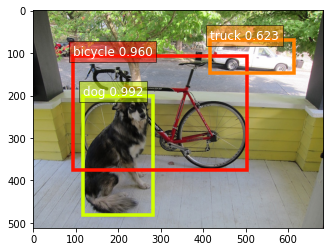

In [18]:
gcv.utils.viz.plot_bbox(chw_image,
                        bounding_boxes,
                        probabilities,
                        class_indicies,
                        class_names= model.classes)